# Mnist Dataset prediction (Computer Vision - Image Classification)

In [228]:
#Import statements
import seaborn as sns #data viz library
import matplotlib.pyplot as plt #data viz library
from sklearn.model_selection import train_test_split # Split data into train and test sets
from tqdm.auto import tqdm # Import tqdm for progress bar

#Torch import statements
import torch #General torch library
from torch import nn #Basic Building Blocks for pytorch
from torch.utils.data import DataLoader #Mini batch data loader
from torch.utils.data import Dataset #Custom dataset
from torchvision import transforms #Data Augmentation
from torchvision import models #pretrained models

In [229]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Data Preparation and exploration 

In [230]:
#Load the data
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
#Preview of test data
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
#Extract the ground truth labels of dataset
y_train = train_data.label

# Drop 'label' column
X_train = train_data.drop(labels = ["label"],axis = 1) 

X_train.head(), y_train.head()

(   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0       0       0       0       0       0       0       0       0       0   
 1       0       0       0       0       0       0       0       0       0   
 2       0       0       0       0       0       0       0       0       0   
 3       0       0       0       0       0       0       0       0       0   
 4       0       0       0       0       0       0       0       0       0   
 
    pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel780  pixel781  pixel782  pixel783  
 0       

In [233]:
#Retrieve the shape of data
X_train.shape, y_train.shape

((42000, 784), (42000,))

### There are in total 784 columns representing the various pixel values for a **28x28 Image Matrix**

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

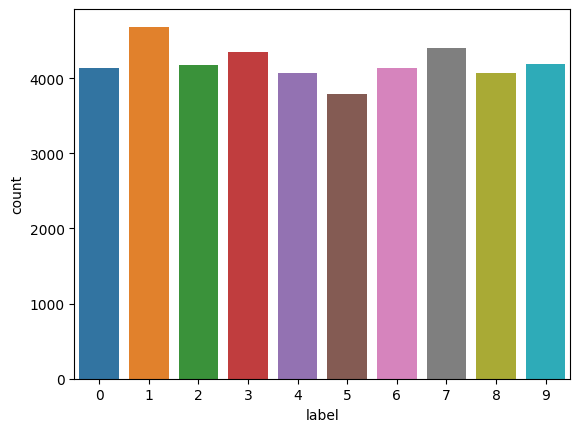

In [234]:
print(y_train.value_counts())
sns.countplot(data=train_data, x="label")

### The labels are well-balanced and is not overtly skewed to certain target labels. Accuracy can be a good metric, in addition to the training/test loss.

In [235]:
print(y_train.isna().sum())
X_train.isna().sum().sum()

0


0

### There is no missing pixel values for all rows in the dataset. Similarly, there is no missing label for even an image.

In [236]:
#Converting y_train to numpy for consistency in types with X_train
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [237]:
type(y_train[10])

numpy.int64

In [238]:
X_train.shape

(42000, 784)

### Reshape the rows to a 28x28 image for **visualisation**

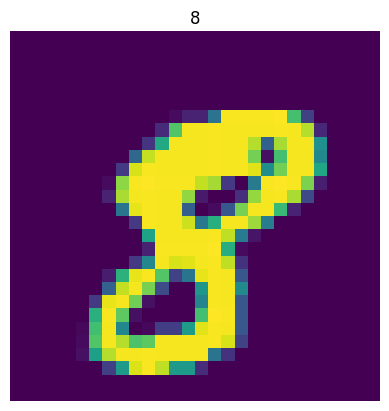

In [239]:
img = X_train[10].reshape(28,28)
plt.axis(False)
plt.title(y_train[10])
plt.imshow(img)

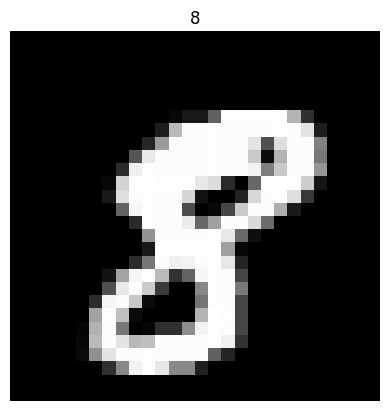

In [240]:
plt.axis(False)
plt.title(y_train[10])
plt.imshow(img, cmap="gray")

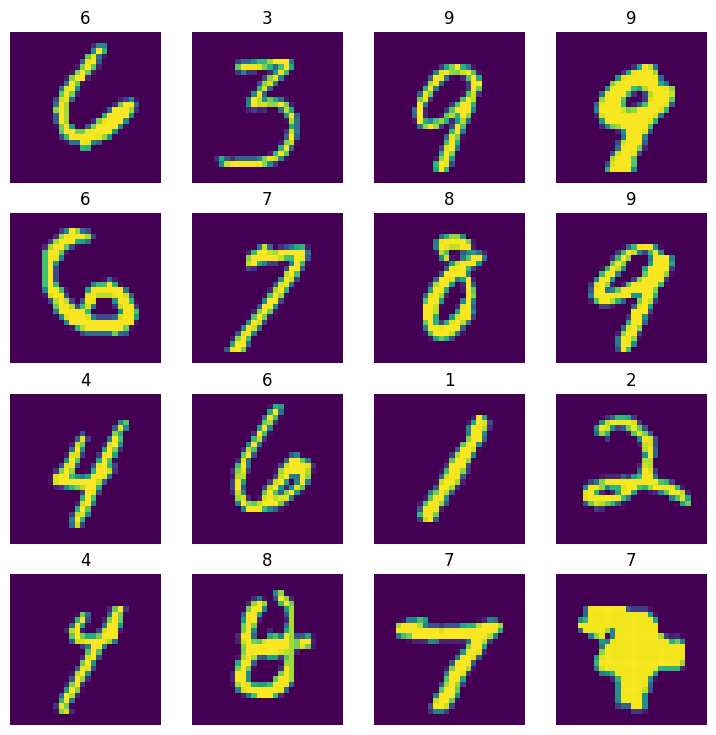

In [241]:
#Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for image_i in range(1, rows * cols + 1):
    random_idx = torch.randint(0,len(X_train),size=[1]).item()
    img, label = X_train[random_idx], y_train[random_idx]
    fig.add_subplot(rows,cols,image_i)
    plt.imshow(img.reshape(28,28))
    plt.title(label)
    plt.axis(False)

## Data Processing for Modelling

In [242]:
#Convert to tensors in particular long tensor for y_train since nn.crossentropy requires y labels to
#be long type
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

X_train[:5], y_train[:5]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([1, 0, 1, 4, 0]))

In [243]:
type(X_train), type(y_train)

(torch.Tensor, torch.Tensor)

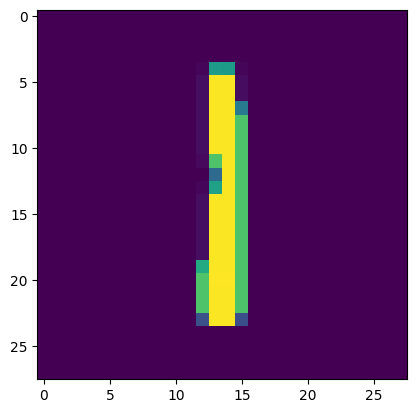

In [244]:
#Perform a sanity check once more after conversion to tensor from numpy
plt.imshow(X_train[2].reshape(28,28))

In [245]:
y_train[2].item()

1

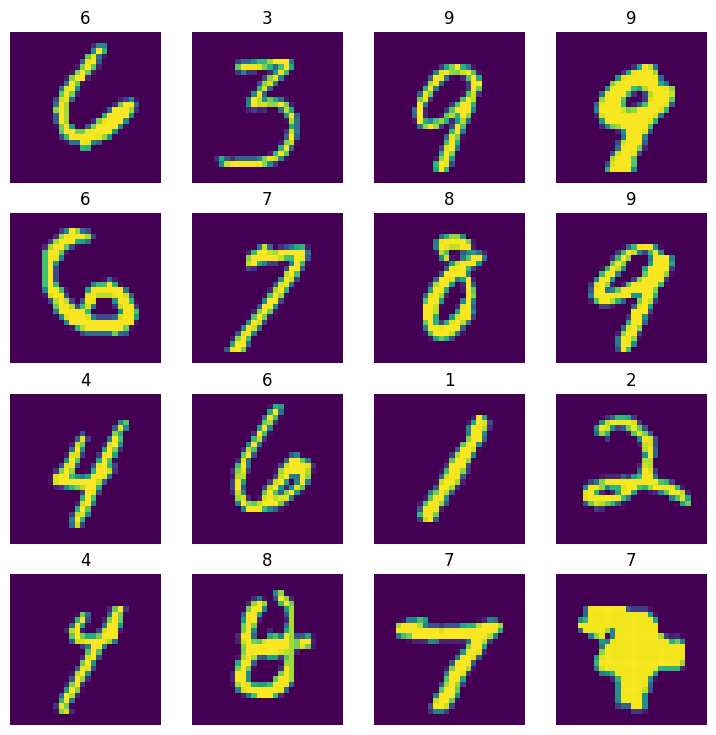

In [246]:
#Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for image_i in range(1, rows * cols + 1):
    random_idx = torch.randint(0,len(X_train),size=[1]).item()
    img, label = X_train[random_idx], y_train[random_idx].item()
    fig.add_subplot(rows,cols,image_i)
    plt.imshow(img.reshape(28,28))
    plt.title(label)
    plt.axis(False)

### Split the **training dataset** into both **training set and validation set**

In [247]:
type(X_train), X_train.shape

(torch.Tensor, torch.Size([42000, 784]))

In [248]:
X_train = X_train.reshape((42000,28,28))
X_train = X_train.unsqueeze(dim=1)

In [249]:
X_train.shape, y_train.shape

(torch.Size([42000, 1, 28, 28]), torch.Size([42000]))

In [250]:
#Set the random seed for reproduciblity
RANDOM_SEED = 42

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.15, # 15% test, 85% train
                                                    random_state=RANDOM_SEED) # make the random split reproducible
len(X_train), len(X_val), len(y_train), len(y_val)

(35700, 6300, 35700, 6300)

### The train dataset consists of 35700 samples, while the validation dataset consists of 6300 samples

In [251]:
#Batch Size hyperparameter
batch_size = 32

train_tensors = torch.utils.data.TensorDataset(X_train,y_train)
val_tensors = torch.utils.data.TensorDataset(X_val,y_val)

# Turn dataset into iterables of mini batches
#Shuffle is true for training to prevent learning of spurious correlation or noise
train_dataloader = DataLoader(train_tensors, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_tensors, batch_size=batch_size, shuffle=False)

print(f"Dataloaders: {train_dataloader,val_dataloader}")
print(f"Length of train dataloaders: {len(train_dataloader)} of batch size {batch_size}")
print(f"Length of validation dataloaders: {len(val_dataloader)} of batch size {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a4590044100>, <torch.utils.data.dataloader.DataLoader object at 0x7a4590044820>)
Length of train dataloaders: 1116 of batch size 32
Length of validation dataloaders: 197 of batch size 32


In [252]:
train_tensors.tensors[0].shape, train_tensors.tensors[1].shape

(torch.Size([35700, 1, 28, 28]), torch.Size([35700]))

Text(0.5, 1.0, '0')

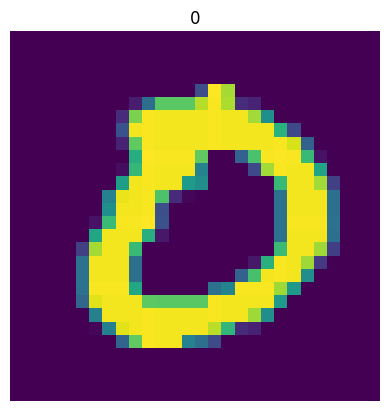

In [253]:
#Sanity check by samplingacos from train dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
plt.imshow(train_features_batch[10].reshape(28,28))
plt.axis(False)
plt.title(train_labels_batch[10].item())

### The dataloader is returning the image and it's respective label accordingly

## Modelling

In [254]:
#Set up device agnostic code - either GPU or CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

## 1. Create a single block vggnet baseline for comparison of performance with subsequent iterative improvements

In [255]:
class VGGNetBaseline(nn.Module):
    """ Replicating subset of VGGNet Architecture for MNIST"""
    
    def __init__(self):
        super().__init__()
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=(3,3),stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3),stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )

               
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=(6272),out_features=10)
        )
        
    def forward(self,x):
        x = self.block_1(x)
        x = self.classifier(x)
        return x
    

In [256]:
torch.manual_seed(42)
model_0 = VGGNetBaseline()
model_0.to(device)

VGGNetBaseline(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=10, bias=True)
  )
)

In [257]:
#Set up Loss function and optimizer for multi class classification
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [258]:
#define accuracy function for reusability
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [259]:
#VGGNetBaseline Model training
epochs = 10
train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    
    #Training
    train_loss, train_acc = 0, 0
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        
        #Allow configs for learning (e.g. weight updates)
        model_0.train()

        #Forward pass
        y_pred = model_0(X)
        y_pred_labels = y_pred.argmax(dim=1)
        
        #Calculate the training loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #Calculate the training accuracy per batch
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred_labels)
        
        #Optimizer zero grad
        optimizer.zero_grad()
        
        #Loss backward
        loss.backward()
        
        #Optimizer step
        optimizer.step()
        
    #Average train loss per batch in an epoch and Average train accuracy per batch in an epoch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    #Append values for plotting
    train_loss_list.append(train_loss.cpu().detach().numpy())
    #train_loss_list.append(train_loss.item())
    train_accuracy_list.append(train_acc)
        
    #Testing
    test_loss, test_acc = 0, 0
    #Set to eval mode to prevent auto diff.
    model_0.eval()
    with torch.inference_mode():
        for X,y in val_dataloader:
            X,y = X.to(device), y.to(device)
            #Forward Pass
            test_pred = model_0(X)
            y_pred_labels = test_pred.argmax(dim=1)
            
            #Calculate the validation loss per batch
            loss = loss_fn(test_pred,y)
            test_loss += loss
            #Calculate the validation accuracy per batch
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred_labels)
            
        #Average test loss per batch in an epoch and Average test accuracy per batch in an epoch
        test_loss /= len(val_dataloader)
        test_acc /= len(val_dataloader)
        #Append values for plotting
        val_loss_list.append(test_loss.cpu().detach().numpy())
        #val_loss_list.append(test_loss.item())
        val_accuracy_list.append(test_acc)
        
    print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f"\n Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
        

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0

 Train Loss: 0.8423 | Test Loss: 0.1519

 Train Acc: 91.0445 | Test Acc: 95.2547
Epoch: 1

 Train Loss: 0.1059 | Test Loss: 0.1177

 Train Acc: 96.7014 | Test Acc: 96.5532
Epoch: 2

 Train Loss: 0.0763 | Test Loss: 0.0951

 Train Acc: 97.5526 | Test Acc: 97.2512
Epoch: 3

 Train Loss: 0.0602 | Test Loss: 0.1092

 Train Acc: 98.0903 | Test Acc: 96.8206
Epoch: 4

 Train Loss: 0.0458 | Test Loss: 0.0961

 Train Acc: 98.4907 | Test Acc: 97.5344
Epoch: 5

 Train Loss: 0.0410 | Test Loss: 0.1180

 Train Acc: 98.6307 | Test Acc: 96.9339
Epoch: 6

 Train Loss: 0.0315 | Test Loss: 0.1337

 Train Acc: 98.9191 | Test Acc: 96.8387
Epoch: 7

 Train Loss: 0.0269 | Test Loss: 0.1334

 Train Acc: 99.0715 | Test Acc: 96.9181
Epoch: 8

 Train Loss: 0.0231 | Test Loss: 0.1833

 Train Acc: 99.2098 | Test Acc: 95.8190
Epoch: 9

 Train Loss: 0.0182 | Test Loss: 0.1223

 Train Acc: 99.3868 | Test Acc: 97.3600


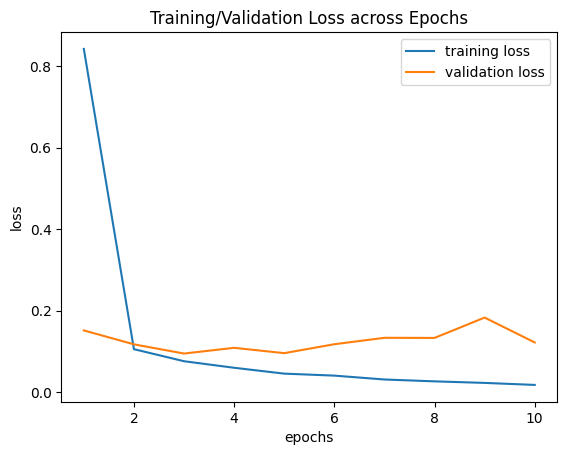

In [260]:
#Plot the loss curves for training loss and validation loss
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_loss_list,label="training loss")
plt.plot(np.arange(1,num_epochs+1),val_loss_list,label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training/Validation Loss across Epochs")
plt.legend()
plt.show()

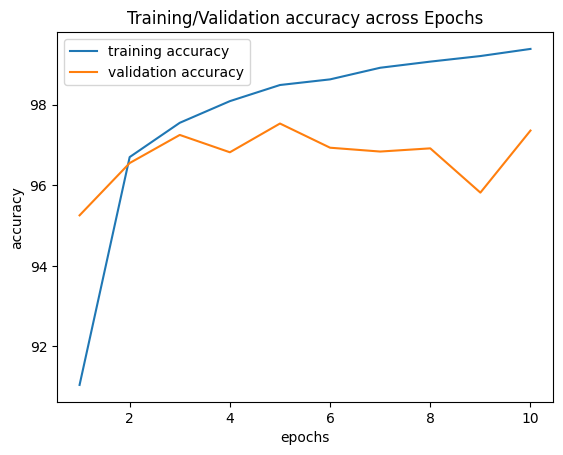

In [261]:
#Plot the accuracy curves for training accuracy and validation accuracy
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_accuracy_list,label="training accuracy")
plt.plot(np.arange(1,num_epochs+1),val_accuracy_list,label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training/Validation accuracy across Epochs")
plt.legend()
plt.show()

### There is some overfitting as the training accuracy is slightly higher at 99.36% as compared to the validation accuracy at 97.48%

## 2. **Iterative improvement of baseline 1.** - incorporate batchnorm2d to investigate if the test accuracy can be improved even more, though 97% is considered to be a rather high score already.

### Incorporating batch normalisation before activation function since it was implemented as such in the original batch norm paper. This helps to center the data before the activation function ,thus speeding up training. However, the practice recently is to include it after the activation function as normalising the values first before activation function is statistically including values that will be voided by the activation function.

In [262]:
class VGGNetBN(nn.Module):
    """ Replicating subset of VGGNet Architecture for MNIST. Including batch normalisation to the architecture """
    
    def __init__(self):
        super().__init__()
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=(3,3),stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3),stride=1,padding=1),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )
               
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=(6272),out_features=10)
        )
        
    def forward(self,x):
        x = self.block_1(x)
        x = self.classifier(x)
        return x

In [263]:
torch.manual_seed(42)
model_1 = VGGNetBN()
model_1.to(device)

VGGNetBN(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=10, bias=True)
  )
)

In [264]:
#Set up Loss function and optimizer for multi class classification
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [265]:
#VGGNetBN Model training
epochs = 10
train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    
    #Training
    train_loss, train_acc = 0, 0
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        
        #Allow configs for learning (e.g. weight updates)
        model_1.train()

        #Forward pass
        y_pred = model_1(X)
        y_pred_labels = y_pred.argmax(dim=1)
        
        #Calculate the training loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #Calculate the training accuracy per batch
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred_labels)
        
        #Optimizer zero grad
        optimizer.zero_grad()
        
        #Loss backward
        loss.backward()
        
        #Optimizer step
        optimizer.step()
        
    #Average train loss per batch in an epoch and Average train accuracy per batch in an epoch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    #Append values for plotting
    train_loss_list.append(train_loss.cpu().detach().numpy())
    #train_loss_list.append(train_loss.item())
    train_accuracy_list.append(train_acc)
        
    #Testing
    test_loss, test_acc = 0, 0
    #Set to eval mode to prevent auto diff.
    model_1.eval()
    with torch.inference_mode():
        for X,y in val_dataloader:
            X,y = X.to(device), y.to(device)
            #Forward Pass
            test_pred = model_1(X)
            y_pred_labels = test_pred.argmax(dim=1)
            
            #Calculate the validation loss per batch
            loss = loss_fn(test_pred,y)
            test_loss += loss
            #Calculate the validation accuracy per batch
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred_labels)
            
        #Average test loss per batch in an epoch and Average test accuracy per batch in an epoch
        test_loss /= len(val_dataloader)
        test_acc /= len(val_dataloader)
        #Append values for plotting
        val_loss_list.append(test_loss.cpu().detach().numpy())
        #val_loss_list.append(test_loss.item())
        val_accuracy_list.append(test_acc)
        
    print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f"\n Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
        

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0

 Train Loss: 0.2093 | Test Loss: 0.1129

 Train Acc: 93.8502 | Test Acc: 96.6756
Epoch: 1

 Train Loss: 0.0744 | Test Loss: 0.0855

 Train Acc: 97.8187 | Test Acc: 97.4370
Epoch: 2

 Train Loss: 0.0542 | Test Loss: 0.0641

 Train Acc: 98.3451 | Test Acc: 98.0398
Epoch: 3

 Train Loss: 0.0425 | Test Loss: 0.0636

 Train Acc: 98.7254 | Test Acc: 98.1191
Epoch: 4

 Train Loss: 0.0357 | Test Loss: 0.0629

 Train Acc: 98.9135 | Test Acc: 98.1191
Epoch: 5

 Train Loss: 0.0297 | Test Loss: 0.0738

 Train Acc: 99.1039 | Test Acc: 97.8018
Epoch: 6

 Train Loss: 0.0256 | Test Loss: 0.0566

 Train Acc: 99.2580 | Test Acc: 98.3253
Epoch: 7

 Train Loss: 0.0213 | Test Loss: 0.0637

 Train Acc: 99.4148 | Test Acc: 98.2143
Epoch: 8

 Train Loss: 0.0183 | Test Loss: 0.0644

 Train Acc: 99.4831 | Test Acc: 98.0557
Epoch: 9

 Train Loss: 0.0154 | Test Loss: 0.0563

 Train Acc: 99.6024 | Test Acc: 98.3729


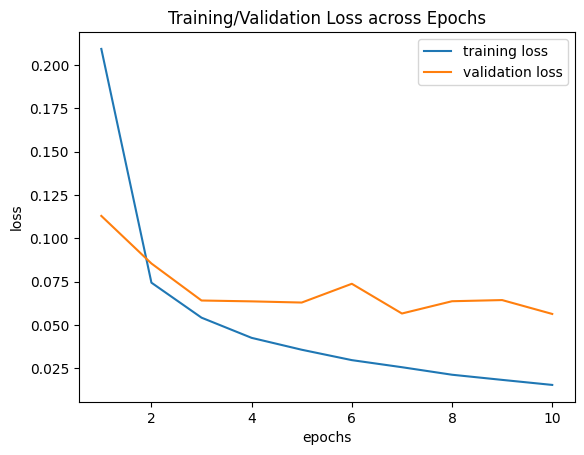

In [266]:
#Plot the loss curves for training loss and validation loss
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_loss_list,label="training loss")
plt.plot(np.arange(1,num_epochs+1),val_loss_list,label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training/Validation Loss across Epochs")
plt.legend()
plt.show()

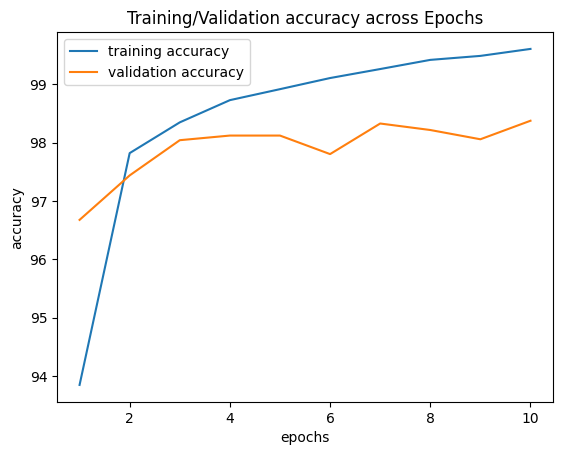

In [267]:
#Plot the accuracy curves for training accuracy and validation accuracy
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_accuracy_list,label="training accuracy")
plt.plot(np.arange(1,num_epochs+1),val_accuracy_list,label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training/Validation accuracy across Epochs")
plt.legend()
plt.show()

### There seems to be about a percentage point improvement from the baseline, suggesting that incorporation of batchnorm can be a viable addition. 

## 3. **Iterative improvement 2** - Data Augmentation (Increasing the variability of the dataset to mitigate overfitting by allowing the model to train on random transformations)

In [268]:
train_tensors.tensors[0].shape, train_tensors.tensors[1].shape

(torch.Size([35700, 1, 28, 28]), torch.Size([35700]))

In [269]:
#Retrieve the item from the tensor dataset
print(train_tensors.tensors[1][11] )
train_tensors.tensors[0][10], train_tensors.tensors[0][10].shape

tensor(2)


(tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0., 129., 254.,  30.,   0.,   0.,
             0.,   0.,   0.,   0.,   0

In [270]:
#Retrieve the number of rows in the tensor dataset
train_tensors.tensors[0].shape[0]

35700

In [271]:
class MNISTDatasetDataAug(Dataset):
    """Custom dataset class for data augmentation of MNIST data"""
    def __init__(self,data_df,transform):
        self.tensor_dataset = data_df
        self.transform = transform
    
    def __len__(self):
        """Need to overide this method as mentioned in docs."""
        number_rows = self.tensor_dataset.tensors[0].shape[0]
        return number_rows
    
    def __getitem__(self,index):
        """Need to overide this method as mentioned in docs."""
        image = self.tensor_dataset.tensors[0][index]
        label = self.tensor_dataset.tensors[1][index]
        if self.transform:
            image = self.transform(image)
        return (image,label)

In [272]:
#Batch Size hyperparameter
batch_size = 32

#train_tensors = torch.utils.data.TensorDataset(X_train,y_train)
#val_tensors = torch.utils.data.TensorDataset(X_val,y_val)
train_transform = transforms.Compose([transforms.RandomRotation(15),
                                     transforms.RandomAffine(degrees=10)])

# Turn dataset into iterables of mini batches
#Shuffle is true for training to prevent learning of spurious correlation or noise
train_aug_dataset = MNISTDatasetDataAug(train_tensors,train_transform)
train_dataloader = DataLoader(train_aug_dataset, batch_size=batch_size, shuffle=True)

val_aug_dataset = MNISTDatasetDataAug(val_tensors,None)
val_dataloader = DataLoader(val_aug_dataset, batch_size=batch_size, shuffle=False)

print(f"Dataloaders: {train_dataloader,val_dataloader}")
print(f"Length of train dataloaders: {len(train_dataloader)} of batch size {batch_size}")
print(f"Length of validation dataloaders: {len(val_dataloader)} of batch size {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a4593d9b730>, <torch.utils.data.dataloader.DataLoader object at 0x7a4590044100>)
Length of train dataloaders: 1116 of batch size 32
Length of validation dataloaders: 197 of batch size 32


In [273]:
class VGGNetBNDataAug(nn.Module):
    """ Replicating subset of VGGNet Architecture for MNIST. Including batch normalisation &
        Data Augmentation to the architecture.
    """
    
    def __init__(self):
        super().__init__()
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=(3,3),stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3),stride=1,padding=1),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )
               
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=(6272),out_features=10)
        )
        
    def forward(self,x):
        x = self.block_1(x)
        x = self.classifier(x)
        return x

In [274]:
torch.manual_seed(42)
model_2 = VGGNetBNDataAug()
model_2.to(device)

VGGNetBNDataAug(
  (block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=10, bias=True)
  )
)

In [275]:
#Set up Loss function and optimizer for multi class classification
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [276]:
#VGGNetBNDataAug Model training
epochs = 10
train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    
    #Training
    train_loss, train_acc = 0, 0
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        
        #Allow configs for learning (e.g. weight updates)
        model_2.train()

        #Forward pass
        y_pred = model_2(X)
        y_pred_labels = y_pred.argmax(dim=1)
        
        #Calculate the training loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #Calculate the training accuracy per batch
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred_labels)
        
        #Optimizer zero grad
        optimizer.zero_grad()
        
        #Loss backward
        loss.backward()
        
        #Optimizer step
        optimizer.step()
        
    #Average train loss per batch in an epoch and Average train accuracy per batch in an epoch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    #Append values for plotting
    train_loss_list.append(train_loss.cpu().detach().numpy())
    #train_loss_list.append(train_loss.item())
    train_accuracy_list.append(train_acc)
        
    #Testing
    test_loss, test_acc = 0, 0
    #Set to eval mode to prevent auto diff.
    model_2.eval()
    with torch.inference_mode():
        for X,y in val_dataloader:
            X,y = X.to(device), y.to(device)
            #Forward Pass
            test_pred = model_2(X)
            y_pred_labels = test_pred.argmax(dim=1)
            
            #Calculate the validation loss per batch
            loss = loss_fn(test_pred,y)
            test_loss += loss
            #Calculate the validation accuracy per batch
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred_labels)
            
        #Average test loss per batch in an epoch and Average test accuracy per batch in an epoch
        test_loss /= len(val_dataloader)
        test_acc /= len(val_dataloader)
        #Append values for plotting
        val_loss_list.append(test_loss.cpu().detach().numpy())
        #val_loss_list.append(test_loss.item())
        val_accuracy_list.append(test_acc)
        
    print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f"\n Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
        

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0

 Train Loss: 0.2904 | Test Loss: 0.1201

 Train Acc: 91.3502 | Test Acc: 96.2767
Epoch: 1

 Train Loss: 0.1229 | Test Loss: 0.0882

 Train Acc: 96.1778 | Test Acc: 97.5027
Epoch: 2

 Train Loss: 0.1012 | Test Loss: 0.0705

 Train Acc: 96.8358 | Test Acc: 98.0126
Epoch: 3

 Train Loss: 0.0891 | Test Loss: 0.0777

 Train Acc: 97.3269 | Test Acc: 97.6568
Epoch: 4

 Train Loss: 0.0800 | Test Loss: 0.0619

 Train Acc: 97.4642 | Test Acc: 98.1554
Epoch: 5

 Train Loss: 0.0715 | Test Loss: 0.0576

 Train Acc: 97.7991 | Test Acc: 98.2007
Epoch: 6

 Train Loss: 0.0686 | Test Loss: 0.0513

 Train Acc: 97.7627 | Test Acc: 98.4046
Epoch: 7

 Train Loss: 0.0635 | Test Loss: 0.0534

 Train Acc: 98.0287 | Test Acc: 98.3435
Epoch: 8

 Train Loss: 0.0640 | Test Loss: 0.0505

 Train Acc: 97.9335 | Test Acc: 98.4862
Epoch: 9

 Train Loss: 0.0580 | Test Loss: 0.0462

 Train Acc: 98.0987 | Test Acc: 98.5791


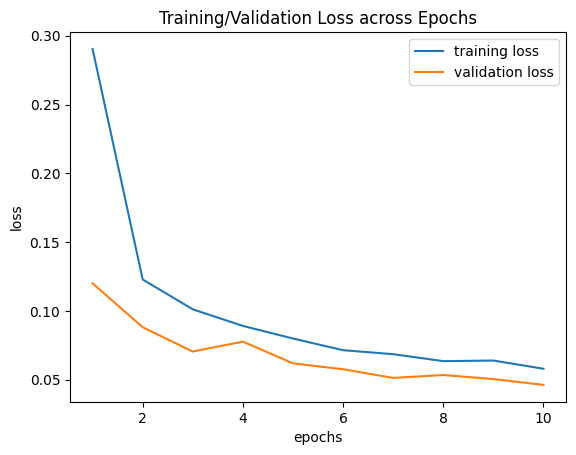

In [277]:
#Plot the loss curves for training loss and validation loss
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_loss_list,label="training loss")
plt.plot(np.arange(1,num_epochs+1),val_loss_list,label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training/Validation Loss across Epochs")
plt.legend()
plt.show()

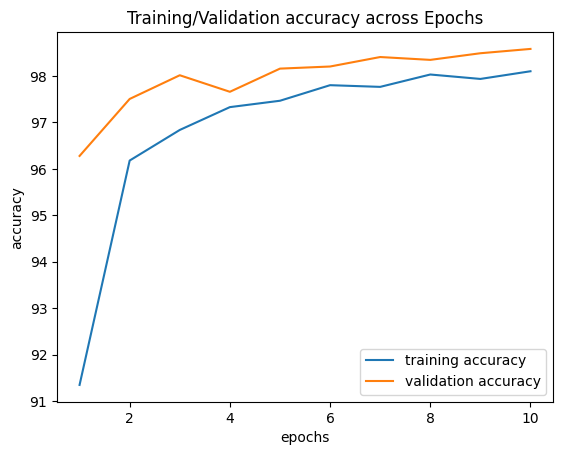

In [278]:
#Plot the accuracy curves for training accuracy and validation accuracy
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_accuracy_list,label="training accuracy")
plt.plot(np.arange(1,num_epochs+1),val_accuracy_list,label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training/Validation accuracy across Epochs")
plt.legend()
plt.show()

### There is a marignal improvement of about 0.2% for the validation accracy. Data Augmentation can be a good addition to the model and the improvements can be even greater if the number of epochs increases or a more robust transformation is adopted (since the transformations are slightly conservative in nature)

## 4. Iterative Improvement 3 - Custom create a more recent and popular model, ResNet with data augmentation dataset

In [279]:
class ResidualBlock(nn.Module):
    """ Helper Class acting as a residual block"""
    def __init__(self,channels):
        #super(ResidualBlock,self).__init__()
        super().__init__()
        
        self.block = nn.Sequential(
                nn.Conv2d(in_channels=channels[0],
                                out_channels=channels[1],
                                kernel_size=(3, 3),
                                stride=(2, 2),
                                padding=1),
                nn.BatchNorm2d(channels[1]),
                nn.ReLU(inplace=True),
                nn.Conv2d(in_channels=channels[1],
                                out_channels=channels[2],
                                kernel_size=(1, 1),
                                stride=(1, 1),
                                padding=0),   
                nn.BatchNorm2d(channels[2])
        )

        self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels=channels[0],
                                out_channels=channels[2],
                                kernel_size=(1, 1),
                                stride=(2, 2),
                                padding=0),
                nn.BatchNorm2d(channels[2])
        )
        
    def forward(self,x):
        shortcut = x
        
        block = self.block(x)
        shortcut = self.shortcut(x)    
        x = torch.nn.functional.relu(block+shortcut)

        return x
        

In [280]:
class ConvNet(nn.Module):
    def __init__(self):
        #super(ConvNet,self).__init__()
        super().__init__()
        
        self.residual_block_1 = ResidualBlock(channels=[1,4,8])
        self.residual_block_2 = ResidualBlock(channels=[8, 16, 32])
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=(1568),out_features=10)
        )
        
    def forward(self,x):
        x = self.residual_block_1(x)
        x = self.residual_block_2(x)
        x = self.classifier(x)
        return x

In [281]:
torch.manual_seed(42)
model_3 = ConvNet()
model_3.to(device)

ConvNet(
  (residual_block_1): ResidualBlock(
    (block): Sequential(
      (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(4, 8, kernel_size=(1, 1), stride=(1, 1))
      (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (shortcut): Sequential(
      (0): Conv2d(1, 8, kernel_size=(1, 1), stride=(2, 2))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (residual_block_2): ResidualBlock(
    (block): Sequential(
      (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_r

In [282]:
#Set up Loss function and optimizer for multi class classification
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.01)

In [283]:
#ConvNet (ResNet) Model training
epochs = 10
train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    
    #Training
    train_loss, train_acc = 0, 0
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        
        #Allow configs for learning (e.g. weight updates)
        model_3.train()

        #Forward pass
        y_pred = model_3(X)
        y_pred_labels = y_pred.argmax(dim=1)
        
        #Calculate the training loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #Calculate the training accuracy per batch
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred_labels)
        
        #Optimizer zero grad
        optimizer.zero_grad()
        
        #Loss backward
        loss.backward()
        
        #Optimizer step
        optimizer.step()
        
    #Average train loss per batch in an epoch and Average train accuracy per batch in an epoch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    #Append values for plotting
    train_loss_list.append(train_loss.cpu().detach().numpy())
    #train_loss_list.append(train_loss.item())
    train_accuracy_list.append(train_acc)
        
    #Testing
    test_loss, test_acc = 0, 0
    #Set to eval mode to prevent auto diff.
    model_3.eval()
    with torch.inference_mode():
        for X,y in val_dataloader:
            X,y = X.to(device), y.to(device)
            #Forward Pass
            test_pred = model_3(X)
            y_pred_labels = test_pred.argmax(dim=1)
            
            #Calculate the validation loss per batch
            loss = loss_fn(test_pred,y)
            test_loss += loss
            #Calculate the validation accuracy per batch
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred_labels)
            
        #Average test loss per batch in an epoch and Average test accuracy per batch in an epoch
        test_loss /= len(val_dataloader)
        test_acc /= len(val_dataloader)
        #Append values for plotting
        val_loss_list.append(test_loss.cpu().detach().numpy())
        #val_loss_list.append(test_loss.item())
        val_accuracy_list.append(test_acc)
        
    print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f"\n Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")
        

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0

 Train Loss: 0.3743 | Test Loss: 0.1705

 Train Acc: 88.8564 | Test Acc: 95.2321
Epoch: 1

 Train Loss: 0.1799 | Test Loss: 0.1251

 Train Acc: 94.6007 | Test Acc: 96.5623
Epoch: 2

 Train Loss: 0.1417 | Test Loss: 0.1101

 Train Acc: 95.7364 | Test Acc: 96.9294
Epoch: 3

 Train Loss: 0.1257 | Test Loss: 0.0969

 Train Acc: 96.2657 | Test Acc: 97.0880
Epoch: 4

 Train Loss: 0.1160 | Test Loss: 0.0914

 Train Acc: 96.5048 | Test Acc: 97.4370
Epoch: 5

 Train Loss: 0.1070 | Test Loss: 0.0864

 Train Acc: 96.7428 | Test Acc: 97.3894
Epoch: 6

 Train Loss: 0.1017 | Test Loss: 0.0759

 Train Acc: 96.9657 | Test Acc: 97.6296
Epoch: 7

 Train Loss: 0.0947 | Test Loss: 0.0734

 Train Acc: 97.0833 | Test Acc: 97.7565
Epoch: 8

 Train Loss: 0.0920 | Test Loss: 0.0756

 Train Acc: 97.0889 | Test Acc: 97.6274
Epoch: 9

 Train Loss: 0.0877 | Test Loss: 0.0722

 Train Acc: 97.3185 | Test Acc: 97.8698


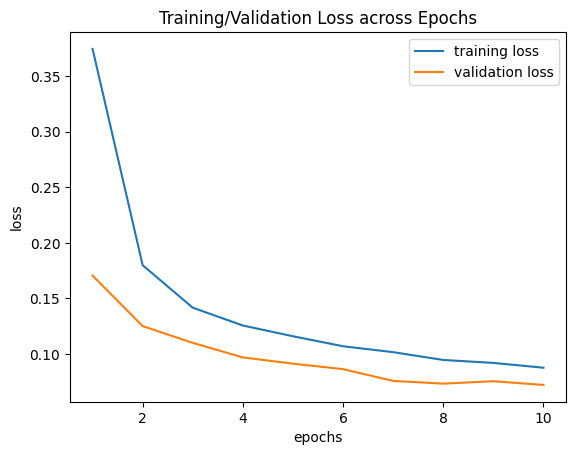

In [284]:
#Plot the loss curves for training loss and validation loss
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_loss_list,label="training loss")
plt.plot(np.arange(1,num_epochs+1),val_loss_list,label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training/Validation Loss across Epochs")
plt.legend()
plt.show()

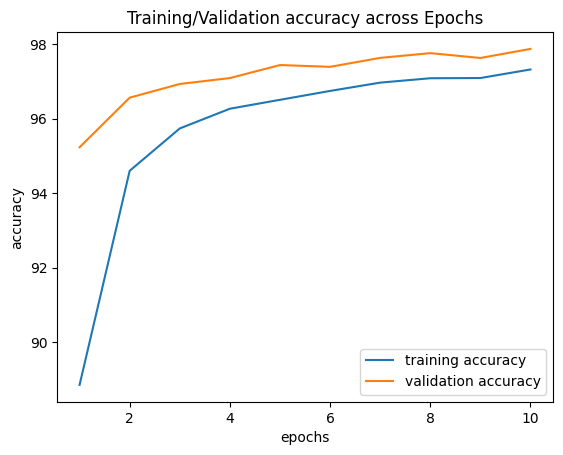

In [285]:
#Plot the accuracy curves for training accuracy and validation accuracy
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_accuracy_list,label="training accuracy")
plt.plot(np.arange(1,num_epochs+1),val_accuracy_list,label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training/Validation accuracy across Epochs")
plt.legend()
plt.show()

### The accuracy produced by the ResNet model with batch norm and data augmentation is lower than the accuracy produced by the VGGNet model with batch norm and data augmentation. A plausible reason is that resnet is optimal for very deep layers, whereas we are simply comparing a small block (1 block of resnet vs vggnet) here and the comparison may not be accurate

## As such, still use ResNet for pretrained models.

## 5. **Pretrained Models using ResNet + Data Augmentation**

### Since pretrained models are pretrained on ImageNet dataset, there is concern about the different data distributions and whether the imagenet dataset of objects generalise well to a digits dataset. However, it is a worthwhile experiment since the early layers of pretrained models are trained (proper weights) to generalise well.

In [341]:
#Batch Size hyperparameter
batch_size = 32

#Use the normalize values to be consistent with the pretrained normalization
normalize = transforms.Normalize(mean=[(0.485+0.456+0.406)/3.0],
                                     std=[(0.229+0.224+0.225)/3.0])

#Train transforms with random transformations. Have to be in range 0-1 and use above normalization
train_transform = transforms.Compose([transforms.RandomRotation(15),
                                     transforms.RandomAffine(degrees=10),
                                     transforms.ToPILImage(),
                                     transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(),
                                     normalize
                                     ])

#No random transformations. Have to be in range 0-1 and use above normalization. 
#Images need to be at least 224 x 224 according to documentation
val_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.Resize(size=(224,224)),
                                    transforms.ToTensor(),
                                    normalize
                                     ])

# Turn dataset into iterables of mini batches
#Shuffle is true for training to prevent learning of spurious correlation or noise
resnet_pretrain_train_dataset = MNISTDatasetDataAug(train_tensors,train_transform)
train_dataloader = DataLoader(resnet_pretrain_train_dataset, batch_size=batch_size, shuffle=True)


resnet_pretrain_val_dataset = MNISTDatasetDataAug(val_tensors,val_transform)
val_dataloader = DataLoader(resnet_pretrain_val_dataset, batch_size=batch_size, shuffle=False)

print(f"Dataloaders: {train_dataloader,val_dataloader}")
print(f"Length of train dataloaders: {len(train_dataloader)} of batch size {batch_size}")
print(f"Length of validation dataloaders: {len(val_dataloader)} of batch size {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a46403793c0>, <torch.utils.data.dataloader.DataLoader object at 0x7a4592cc8eb0>)
Length of train dataloaders: 1116 of batch size 32
Length of validation dataloaders: 197 of batch size 32


In [342]:
model_4 = models.resnext50_32x4d(pretrained=True)
model_4

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

### Freeze the model for fine-tuning

In [343]:
#Replace first layer conv1 to accept a single channel image instead of 3 channels
model_4.conv1 = torch.nn.Conv2d(1, 64, (7, 7), (2, 2), (3, 3), bias=False)

#freeze the parameters
for param in model_4.parameters():
    param.requires_grad = False

#Replace default num_classes to 10 and set this Linear layer to trainable
model_4.fc = nn.Linear(2048,10)
model_4.fc.requires_grad = True

In [344]:
#device agnostic gpu or cpu and recheck the layers
model_4.to(device)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [345]:
#Set up Loss function and optimizer for multi class classification
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),lr=0.01)

In [346]:
#ConvNet (ResNet) Model training
epochs = 4
train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    
    #Training
    train_loss, train_acc = 0, 0
    #Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)
        
        #Allow configs for learning (e.g. weight updates)
        model_4.train()

        #Forward pass
        y_pred = model_4(X)
        y_pred_labels = y_pred.argmax(dim=1)
        
        #Calculate the training loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #Calculate the training accuracy per batch
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred_labels)
        
        #Optimizer zero grad
        optimizer.zero_grad()
        
        #Loss backward
        loss.backward()
        
        #Optimizer step
        optimizer.step()
        
    #Average train loss per batch in an epoch and Average train accuracy per batch in an epoch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    #Append values for plotting
    train_loss_list.append(train_loss.cpu().detach().numpy())
    #train_loss_list.append(train_loss.item())
    train_accuracy_list.append(train_acc)
        
    #Testing
    test_loss, test_acc = 0, 0
    #Set to eval mode to prevent auto diff.
    model_4.eval()
    with torch.inference_mode():
        for X,y in val_dataloader:
            X,y = X.to(device), y.to(device)
            #Forward Pass
            test_pred = model_4(X)
            y_pred_labels = test_pred.argmax(dim=1)
            
            #Calculate the validation loss per batch
            loss = loss_fn(test_pred,y)
            test_loss += loss
            #Calculate the validation accuracy per batch
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred_labels)
            
        #Average test loss per batch in an epoch and Average test accuracy per batch in an epoch
        test_loss /= len(val_dataloader)
        test_acc /= len(val_dataloader)
        #Append values for plotting
        val_loss_list.append(test_loss.cpu().detach().numpy())
        #val_loss_list.append(test_loss.item())
        val_accuracy_list.append(test_acc)
        
    print(f"\n Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
    print(f"\n Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0

 Train Loss: 1.2004 | Test Loss: 0.7316

 Train Acc: 64.9972 | Test Acc: 80.0150
Epoch: 1

 Train Loss: 0.8368 | Test Loss: 0.6070

 Train Acc: 74.7469 | Test Acc: 82.3196
Epoch: 2

 Train Loss: 0.7498 | Test Loss: 0.5410

 Train Acc: 76.5250 | Test Acc: 84.5540
Epoch: 3

 Train Loss: 0.7086 | Test Loss: 0.5087

 Train Acc: 77.6058 | Test Acc: 84.7716


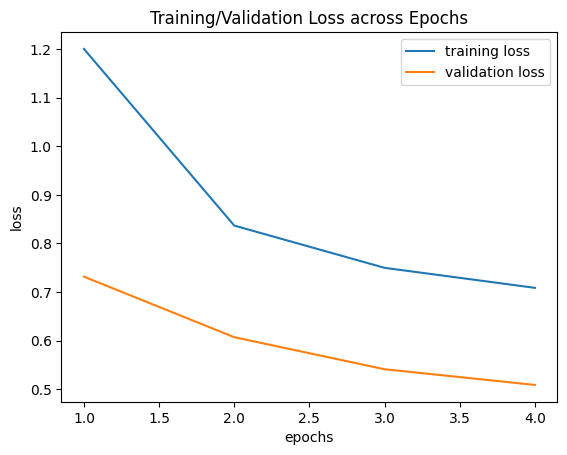

In [347]:
#Plot the loss curves for training loss and validation loss
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_loss_list,label="training loss")
plt.plot(np.arange(1,num_epochs+1),val_loss_list,label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training/Validation Loss across Epochs")
plt.legend()
plt.show()

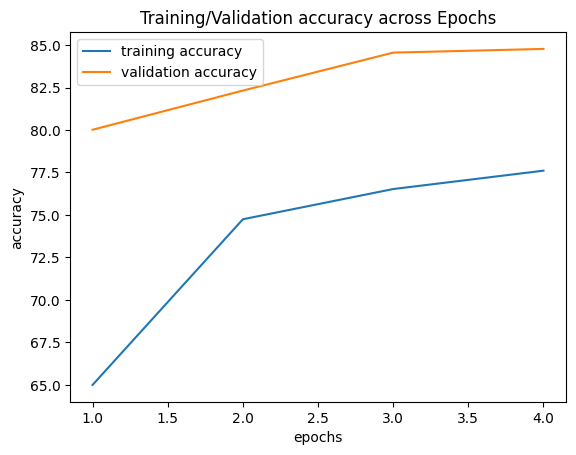

In [348]:
#Plot the accuracy curves for training accuracy and validation accuracy
num_epochs = len(train_loss_list)
plt.plot(np.arange(1,num_epochs+1),train_accuracy_list,label="training accuracy")
plt.plot(np.arange(1,num_epochs+1),val_accuracy_list,label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training/Validation accuracy across Epochs")
plt.legend()
plt.show()

### It can be seen that pretraiend resnet even with fine-tuning has lower accuracy than a single block vggnet, possibly because the data distribution between the pretrained dataset and the mnist dataset is radically different.

### As such, use the vggnet with batch norm and data augmentation for inference.